# Pymaceuticals Inc.
---

### Analysis

1) From summary statistics table, Ramicane has the best performance among all the other drug regimens, with the lowest mean (40.22 mm3)/median (40.67 mm3) of tumor volume. Capomulin is at the second position. Its mean (40.68 mm3) /median (41.56 mm3) tumor volume are just slightly lower than what Ramicane has.

2)  In addition, from summary statistics table, per each regimen, its mean and median of tumor volume are close with each other. This could be a signal that the distribution of data for each different regimen is relatively symmetric. By looking into the variance of tumor volume, both Ramicane and Capomulin have a smaller value around 24, whereas all the other drug regimens have a larger variance (above 39). Especially Ketapril, its variance is as high as 69, which shows this type of drug regimen doesn’t have a good reliability. Ketapril’s mean of tumor volume (55.24 mm3) is also the highest value comparing with all the other drug regimens.

3) From box plot showing the distribution of the tumor value for Capomulin / Ramicane / Infubinol / Ceftamin, Infubinol drug regimen has a potential outlier. However, it does not strongly effect the overall Infubinol’s central tendency.

4) For Capomulin regimen, there is a positive correlation between the mouse weight and the averaged observed tumor volume. According to the calculated linear regression model, if the mouse weight is increased by 1g, the average tumor volume will be increased by 0.95 mm3. 
 

In [392]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [393]:
# Checking the number of mice.
number_of_mice = len(merged_df["Mouse ID"].unique())
number_of_mice

249

In [394]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [401]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989",:]
duplicate_mice_df 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [402]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (fully drop the duplicate mouse ID: g989)
cleaned_df = merged_df.drop(duplicate_mice_df.index)
cleaned_df.head()

# Solution B: still to keep the 1st result of mouse ID: g989, please refer the following code.
#cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID"])
#cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [403]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(cleaned_df["Mouse ID"].unique())
number_of_mice

248

## Summary Statistics

In [404]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
regimen_median=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
regimen_var=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
regimen_std=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
regimen_SEM=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean Tumor Volume":regimen_mean,"Median Tumor Volume":regimen_median,
                        "Tumor Volume Variance":regimen_var,"Tumor Volume Std. Dev.":regimen_std,
                               "Tumor Volume Std. Err.":regimen_SEM})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [405]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

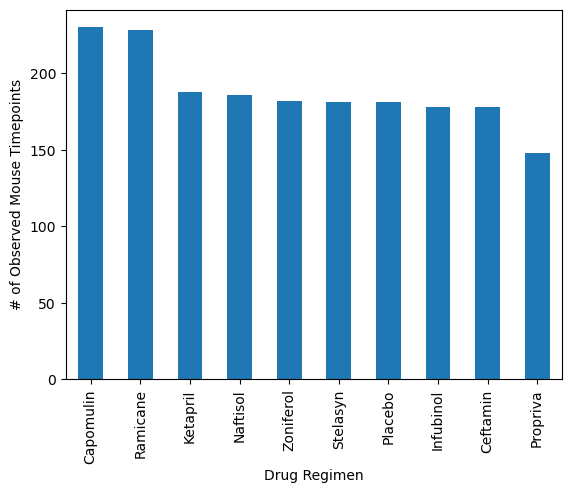

In [407]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_mice_per_regimen = cleaned_df["Drug Regimen"].value_counts()

total_mice_per_regimen.plot(kind="bar")


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


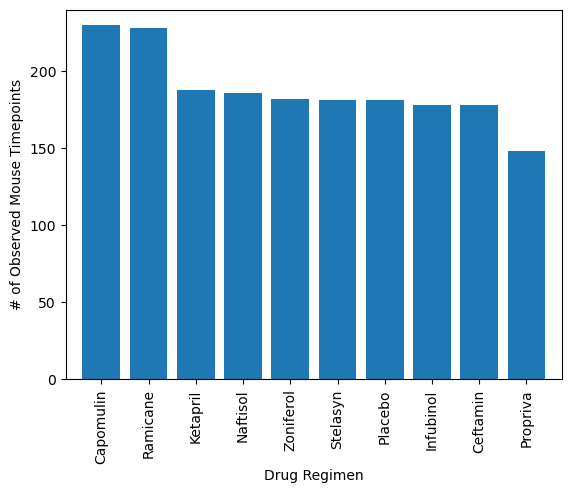

In [408]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = total_mice_per_regimen.index
y_axis = total_mice_per_regimen.values

plt.bar(x_axis, y_axis,align="center")
plt.xticks(rotation="vertical")


plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis_mice)+10)


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

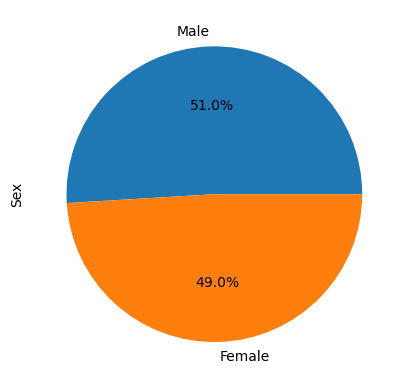

In [409]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

total_mice_per_sex = cleaned_df["Sex"].value_counts()

total_mice_per_sex.plot(kind="pie",y=total_mice_per_sex,autopct="%1.1f%%")

plt.show()

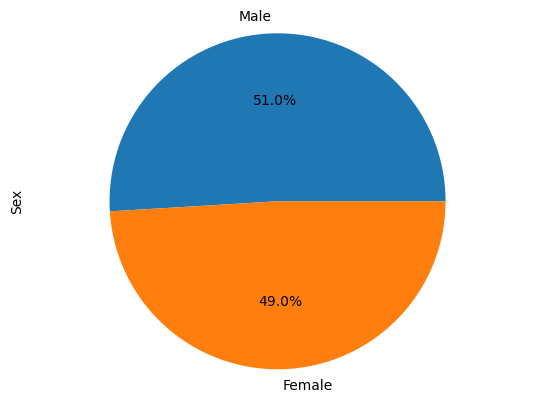

In [410]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(total_mice_per_sex, autopct="%1.1f%%",labels=["Male","Female"])

plt.ylabel("Sex")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [411]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_reset = greatest_timepoint.reset_index()

merged_timepoint=pd.merge(greatest_timepoint_reset,cleaned_df,on=["Mouse ID","Timepoint"],how="left")
merged_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [413]:
# Put treatments into a list for for loop (and later for plot labels)
four_regimens =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
for regimen in four_regimens:
    
    tumor_vol= merged_timepoint.loc[merged_timepoint["Drug Regimen"]== regimen, "Tumor Volume (mm3)"]
    
    # add subset
    total_tumor_vol.append(tumor_vol)  
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{regimen}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

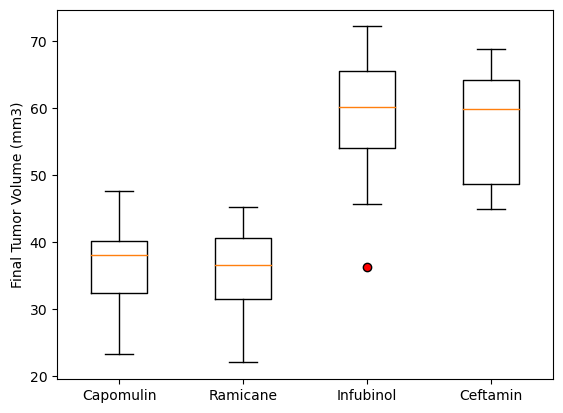

In [415]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(total_tumor_vol,labels=four_regimens,flierprops={"marker":"o","markerfacecolor":"red"})
ax.set_ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

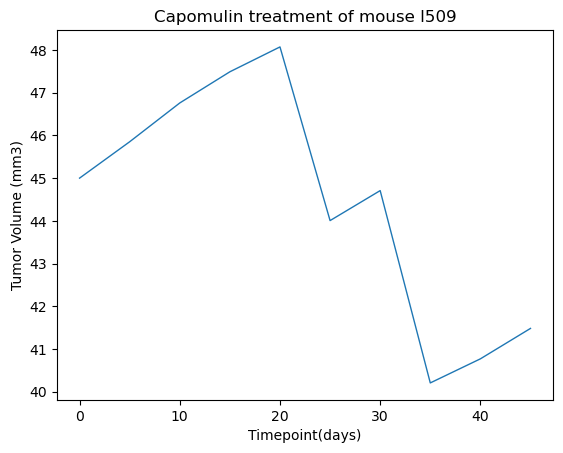

In [417]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_l509 = cleaned_df.loc[(cleaned_df["Drug Regimen"]== "Capomulin")&(cleaned_df["Mouse ID"]== "l509"),:]

x_axis = capomulin_l509["Timepoint"]
y_axis = capomulin_l509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, linewidth=1)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

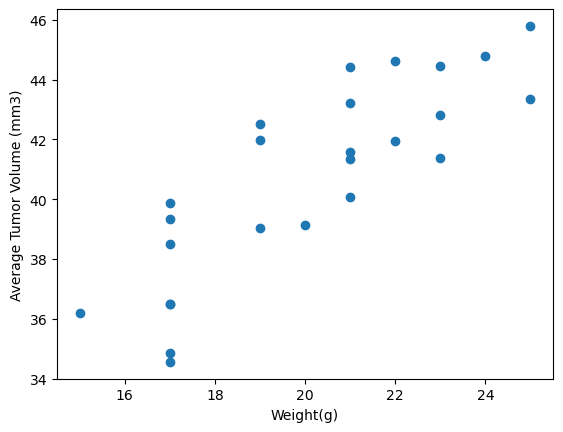

In [418]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_camolulin = cleaned_df.loc[(cleaned_df["Drug Regimen"]== "Capomulin"),:].groupby("Mouse ID").mean(numeric_only=True)

x_values = average_tumor_camolulin["Weight (g)"]
y_values = average_tumor_camolulin["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


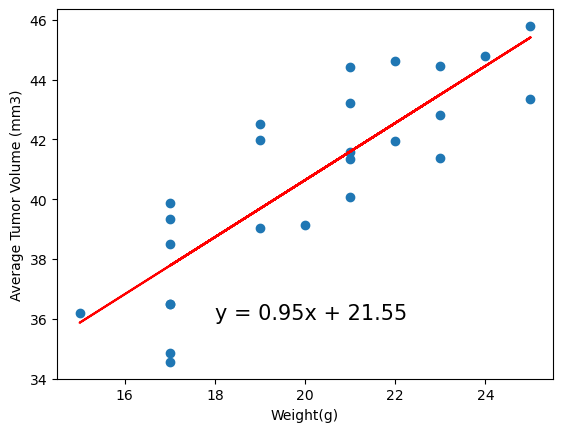

In [420]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# (printing out the value of correlation coefficient directly from linear regression model)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()

# Solution B: for calculating and printing the correlation coefficient separately
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# please refer to the following code
# print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
